<a href="https://colab.research.google.com/github/adithya-183/ML-INTERNSHIP/blob/main/TASK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GETTING REQURIED LIBRARIES**

In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **READING THE DATA SETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/segmentation data (1).csv')

In [ ]:
train.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [ ]:
train.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
train.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


### **CHECKING THE DATA SET**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
train.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
train.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'ID' has 2000 unique values.
Column 'Sex' has 2 unique values.
Column 'Marital status' has 2 unique values.
Column 'Age' has 58 unique values.
Column 'Education' has 4 unique values.
Column 'Income' has 1982 unique values.
Column 'Occupation' has 3 unique values.
Column 'Settlement size' has 3 unique values.


### **COLUMNS OF THE DATA SET**

In [ ]:
train.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

### **CORRELATION MATRIX ***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

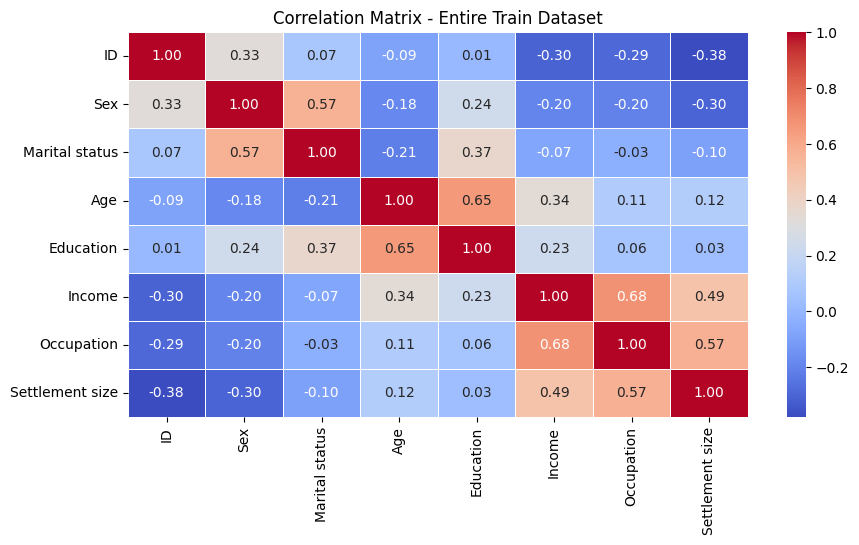

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train' with your dataset
train = pd.read_csv('/content/segmentation data (1).csv')

# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
N = 10

# Calculate absolute correlation values for each feature
correlation_values = correlation_matrix.abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)

# Exclude self-correlations and duplicate correlations
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

# Select the top 10 features with highest absolute correlation values
top_features = sorted_correlation[:N]

print("Top", N, "features based on correlation:")
print(top_features)

Top 10 features based on correlation:
Occupation       Income             0.680357
Income           Occupation         0.680357
Education        Age                0.654605
Age              Education          0.654605
Occupation       Settlement size    0.571795
Settlement size  Occupation         0.571795
Marital status   Sex                0.566511
Sex              Marital status     0.566511
Income           Settlement size    0.490881
Settlement size  Income             0.490881
dtype: float64


### **EDA**

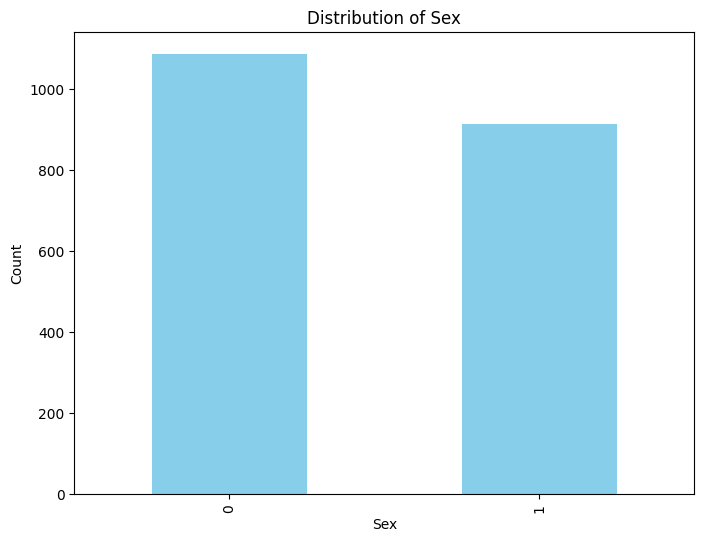

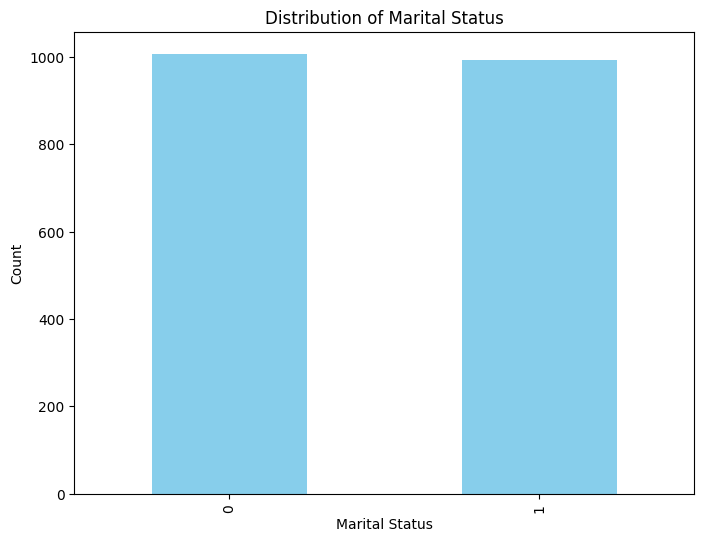

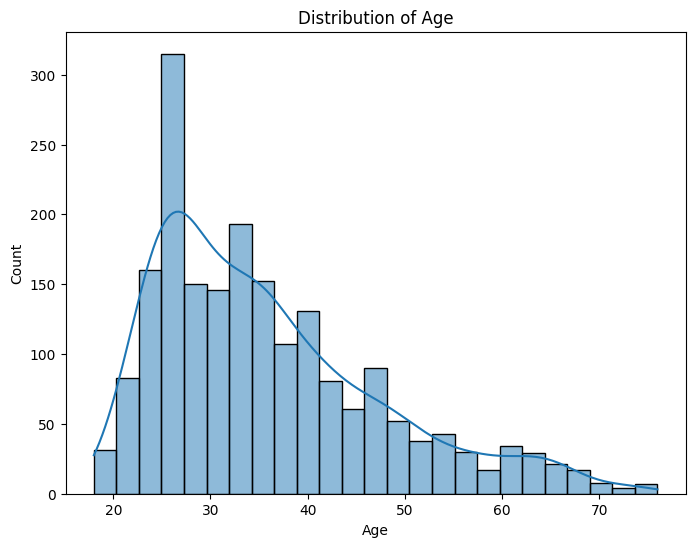

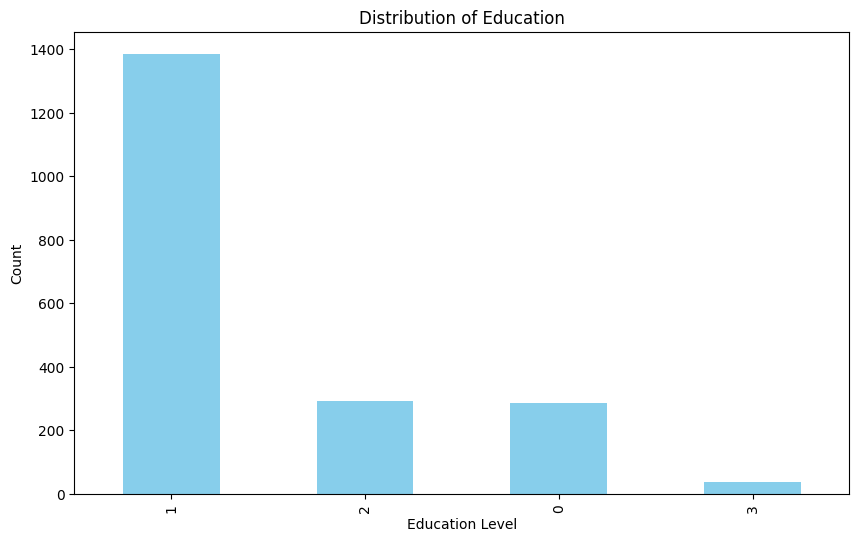

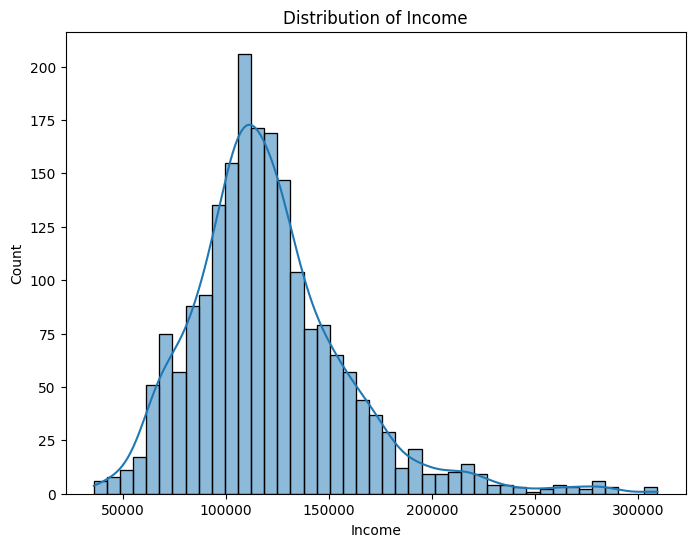

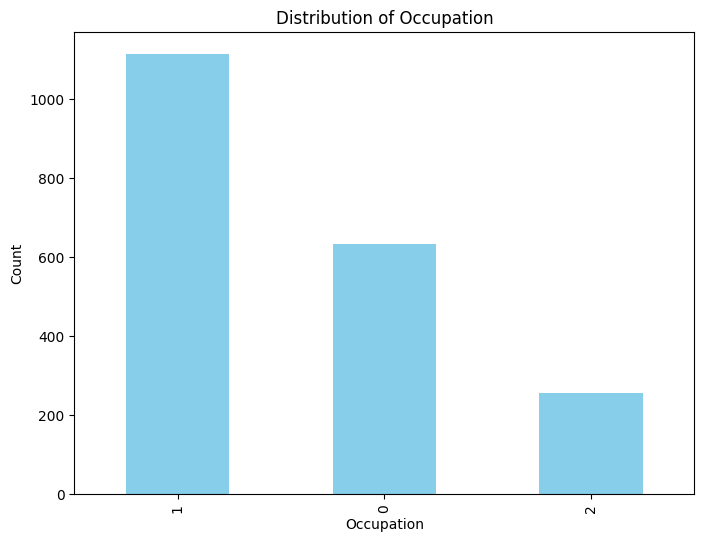

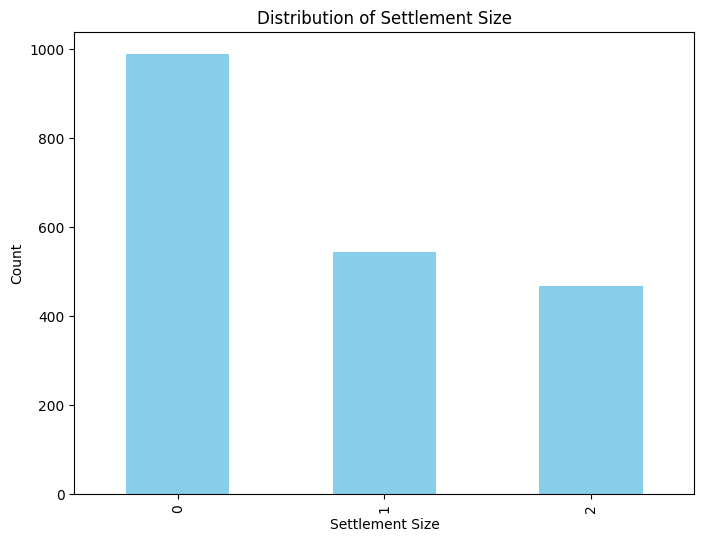

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')


# Sex
plt.figure(figsize=(8, 6))
train['Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Marital status
plt.figure(figsize=(8, 6))
train['Marital status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Age
plt.figure(figsize=(8, 6))
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Education
plt.figure(figsize=(10, 6))
train['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Income
plt.figure(figsize=(8, 6))
sns.histplot(train['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

# Occupation
plt.figure(figsize=(8, 6))
train['Occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

# Settlement Size
plt.figure(figsize=(8, 6))
train['Settlement size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Settlement Size')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.show()

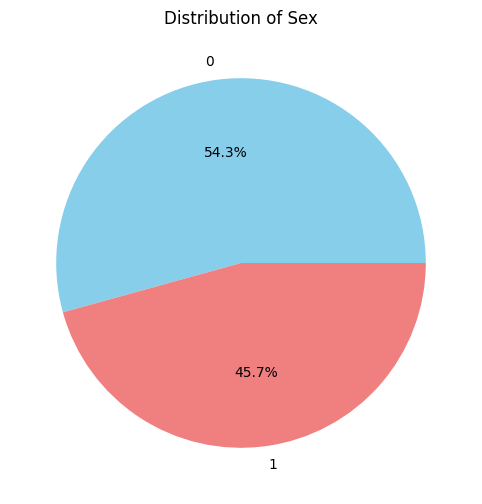

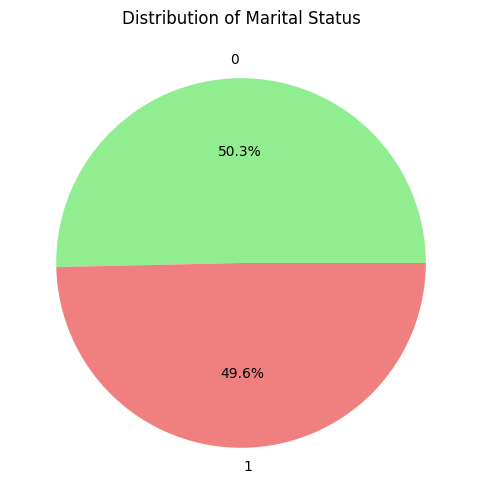

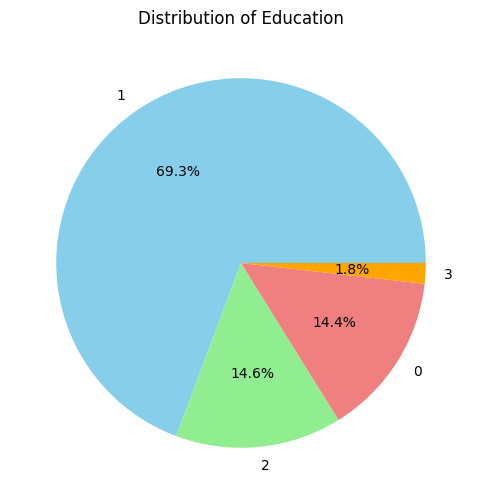

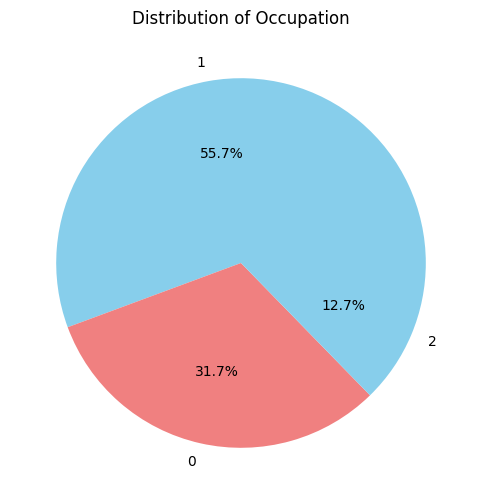

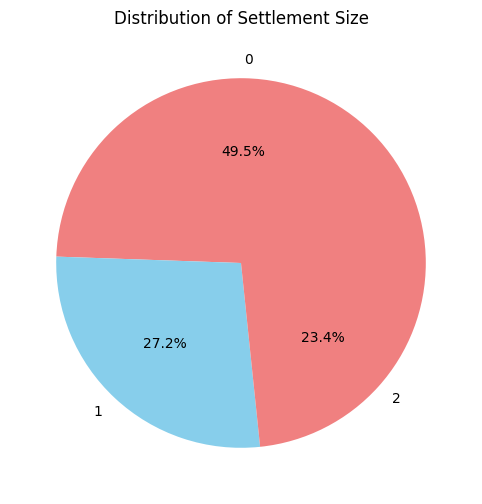

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Pie chart for 'ID' (Not recommended for 'ID' as it's typically unique)
# Pie chart for 'Sex'
plt.figure(figsize=(8, 6))
train['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

# Pie chart for 'Marital status'
plt.figure(figsize=(8, 6))
train['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'])
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()



# Pie chart for 'Education'
plt.figure(figsize=(8, 6))
train['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Education')
plt.ylabel('')
plt.show()



# Pie chart for 'Occupation'
plt.figure(figsize=(8, 6))
train['Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Occupation')
plt.ylabel('')
plt.show()

# Pie chart for 'Settlement size'
plt.figure(figsize=(8, 6))
train['Settlement size'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Settlement Size')
plt.ylabel('')
plt.show()

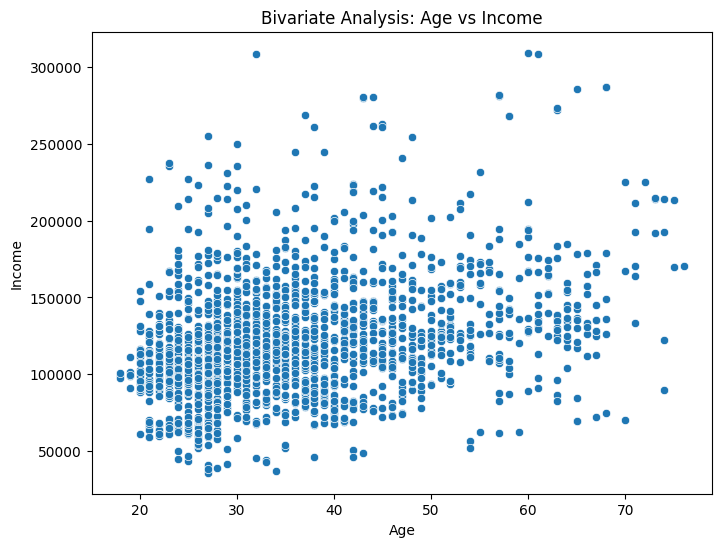

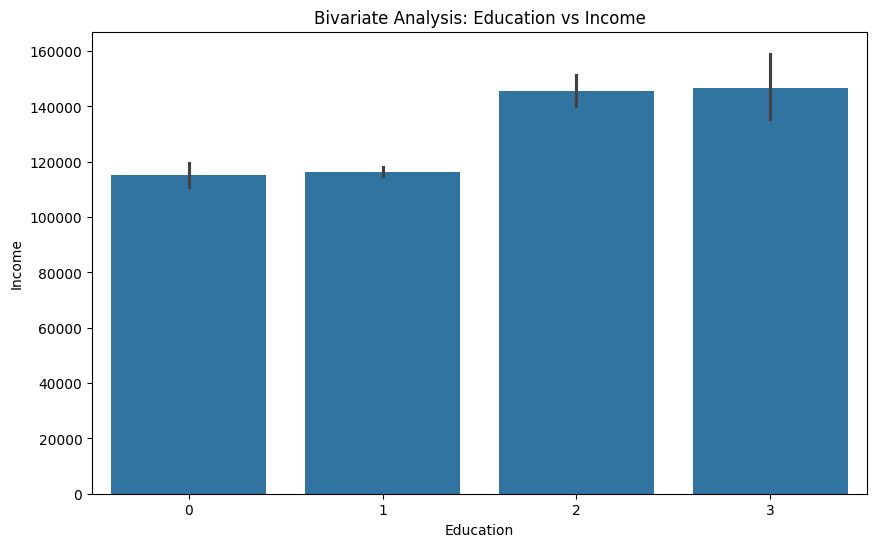

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=train)
plt.title('Bivariate Analysis: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=train)
plt.title('Bivariate Analysis: Education vs Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

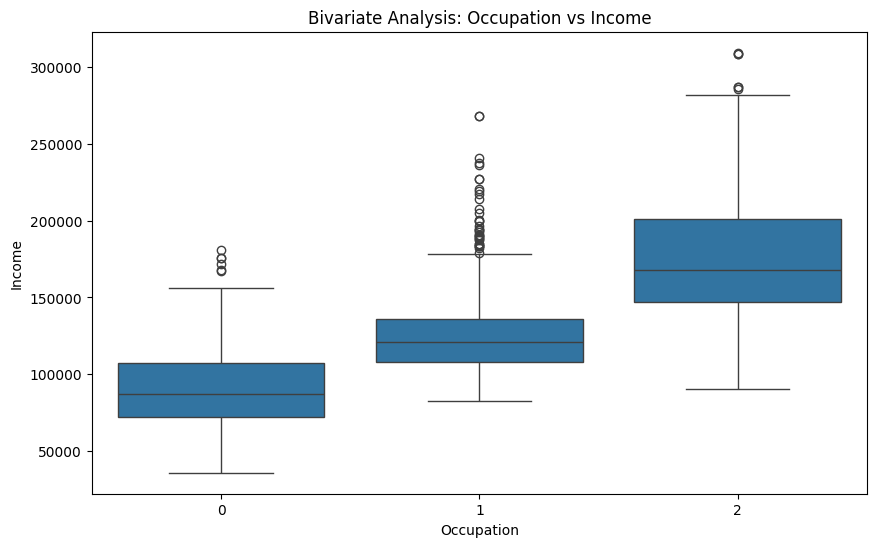

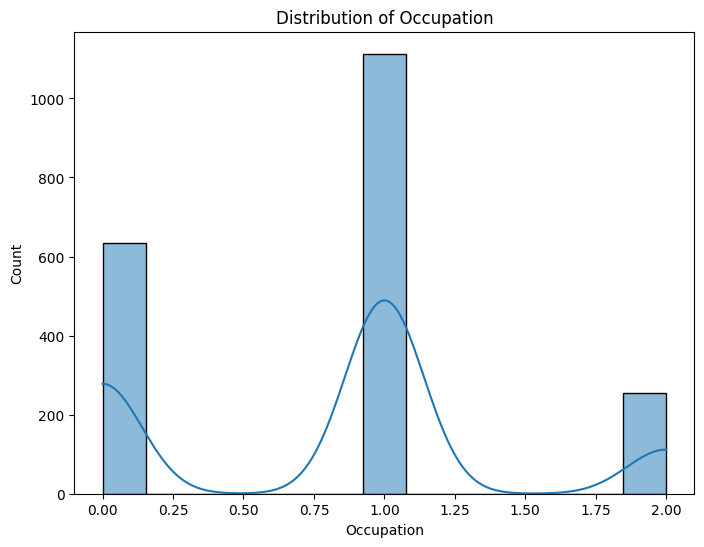

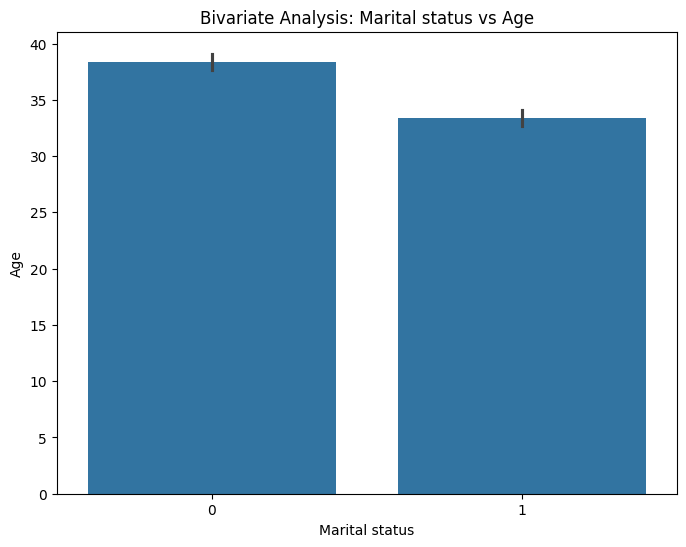

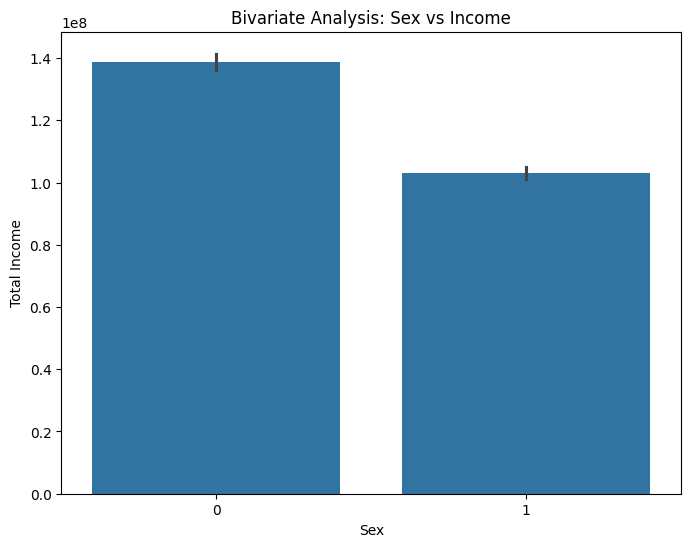

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Income', data=train)
plt.title('Bivariate Analysis: Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()



plt.figure(figsize=(8, 6))
sns.histplot(train['Occupation'], kde=True)
plt.title('Distribution of Occupation')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Marital status', y='Age', data=train)
plt.title('Bivariate Analysis: Marital status vs Age')
plt.xlabel('Marital status')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Income', data=train, estimator=sum)
plt.title('Bivariate Analysis: Sex vs Income')
plt.xlabel('Sex')
plt.ylabel('Total Income')
plt.show()

### **ADDITIONAL EDA**

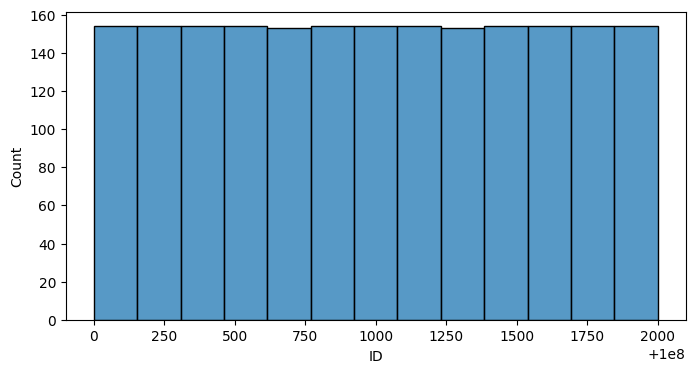

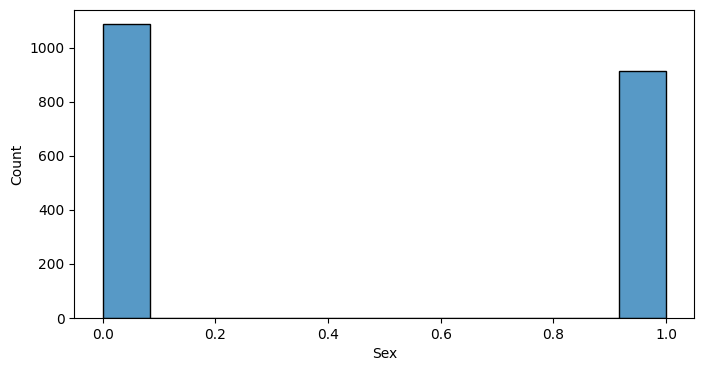

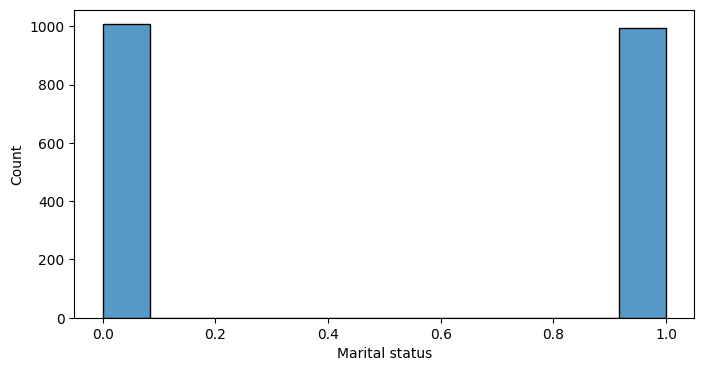

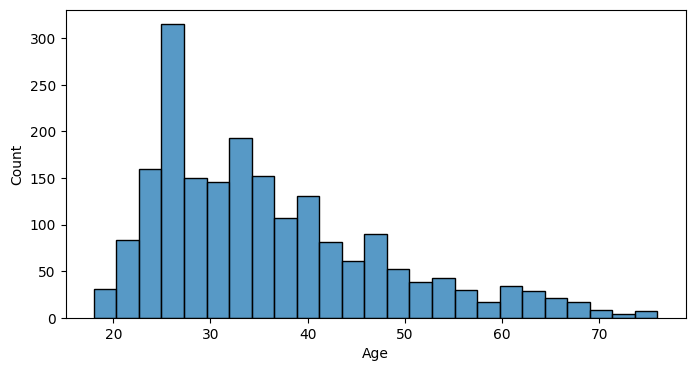

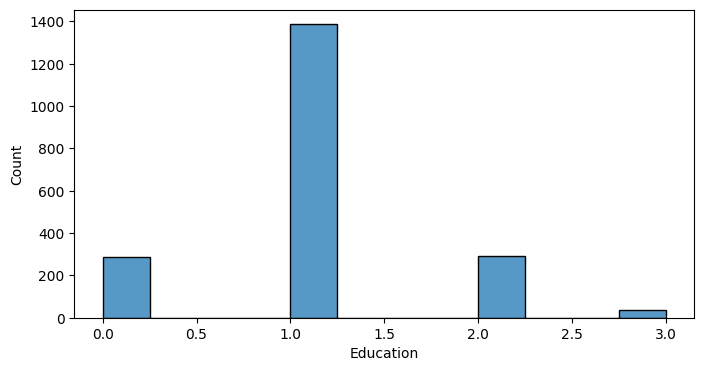

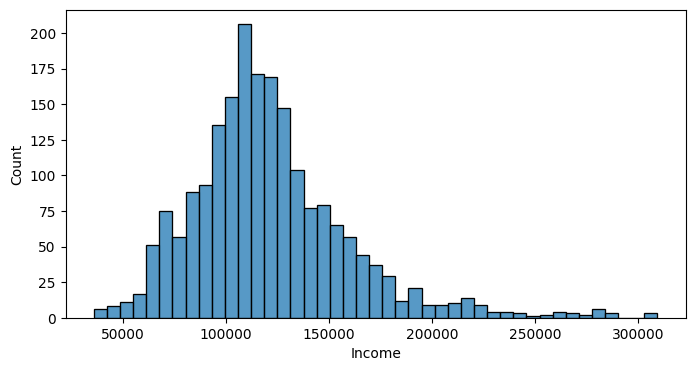

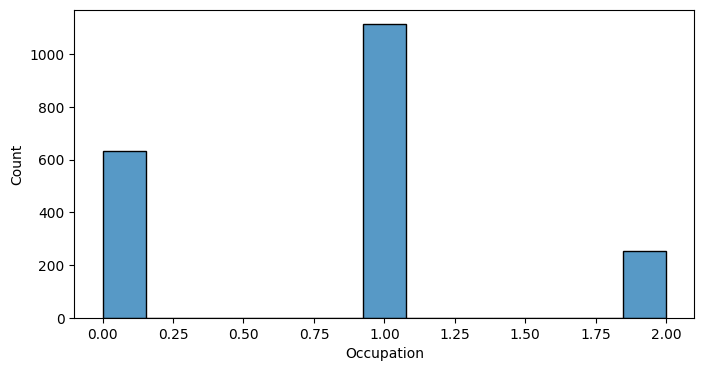

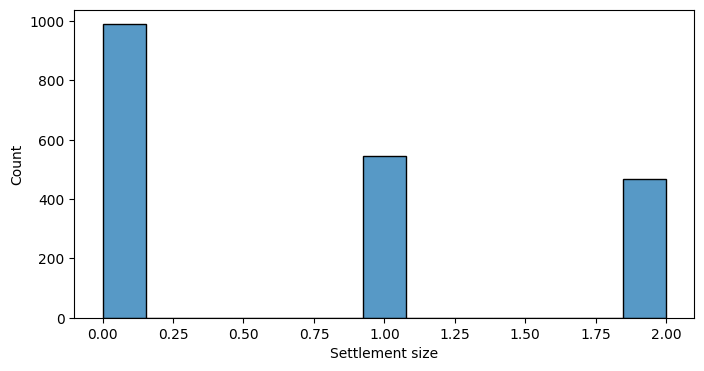

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train = pd.read_csv('/content/segmentation data.csv')
# Given column names
column_names = ['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

for column_name in column_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=column_name)
    plt.savefig(column_name + '_histogram.png')

plt.show()  # Added to display the plots if needed
  # Added to display the plots if needed


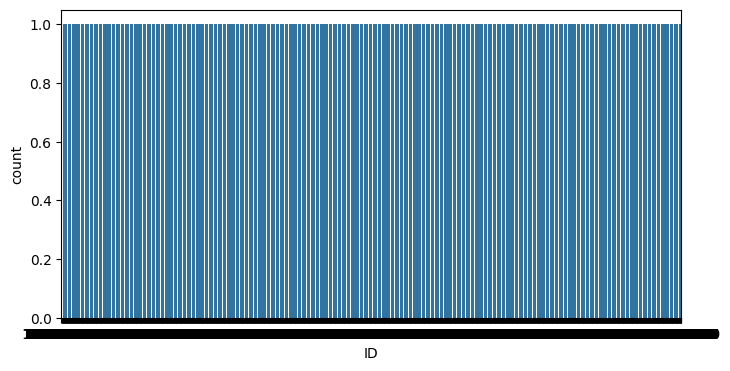

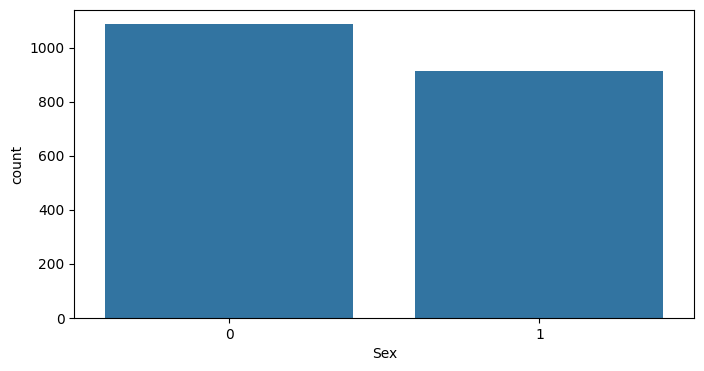

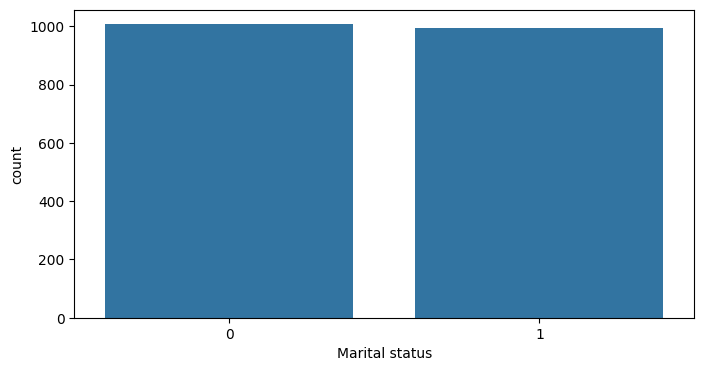

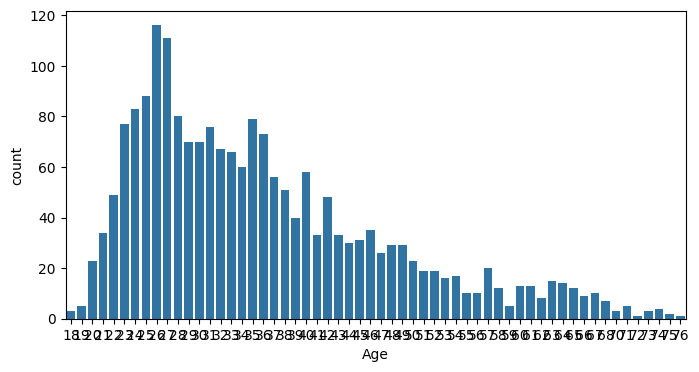

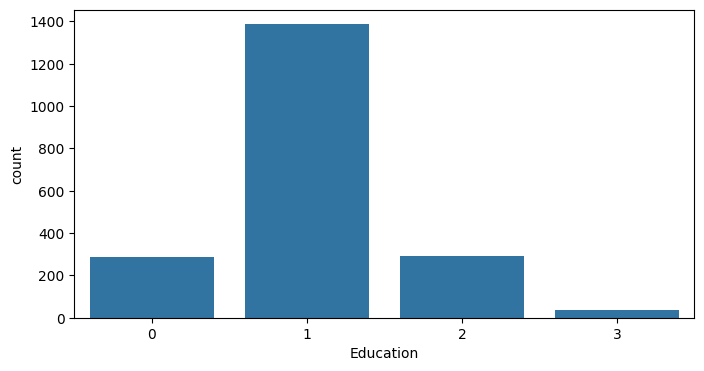

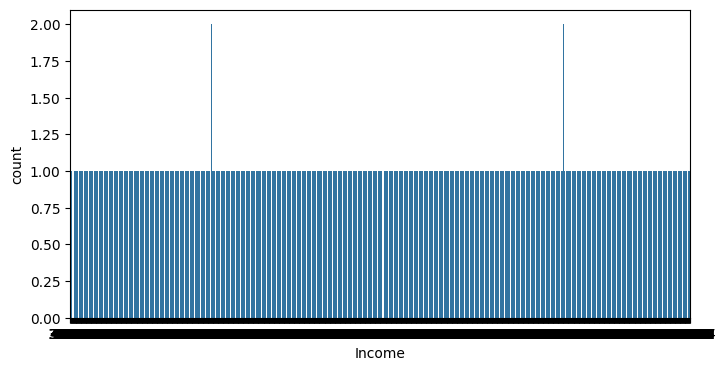

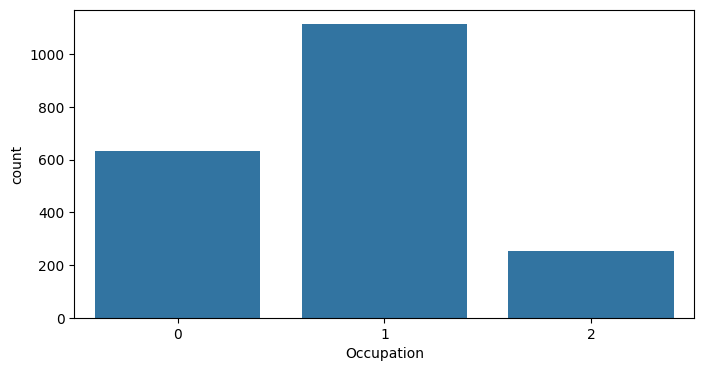

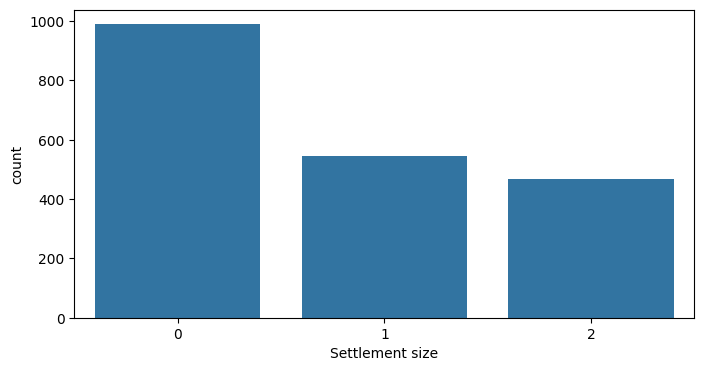

In [ ]:
for category in column_names:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=category)

<Axes: xlabel='Age', ylabel='Income'>

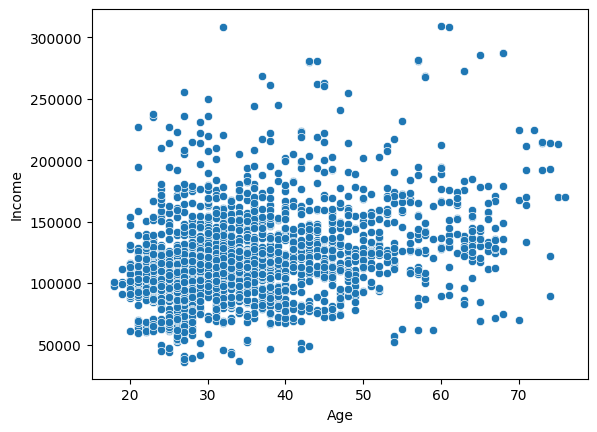

In [ ]:
sns.scatterplot(x='Age', y='Income', data=train)

### **Dimensionality reduction using PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv("/content/segmentation data (1).csv")

In [ ]:
X = data[['Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

In [ ]:
label_encoder = LabelEncoder()
X['Occupation'] = label_encoder.fit_transform(X['Occupation'])
X['Settlement size'] = label_encoder.fit_transform(X['Settlement size'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("Scaled Data Information:")
print(pd.DataFrame(X_scaled, columns=X.columns).describe())

Scaled Data Information:
                Age     Education        Income    Occupation  Settlement size
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03      2000.000000
mean   9.059420e-17 -5.684342e-17  1.563194e-16  2.842171e-17         0.000000
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00         1.000250
min   -1.528532e+00 -1.731068e+00 -2.234225e+00 -1.269525e+00        -0.909730
25%   -7.603825e-01 -6.337243e-02 -6.113281e-01 -1.269525e+00        -0.909730
50%   -2.482829e-01 -6.337243e-02 -1.418903e-01  2.968230e-01         0.321298
75%    5.198664e-01 -6.337243e-02  4.492952e-01  2.968230e-01         0.321298
max    3.421764e+00  3.272018e+00  4.945225e+00  1.863171e+00         1.552326


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

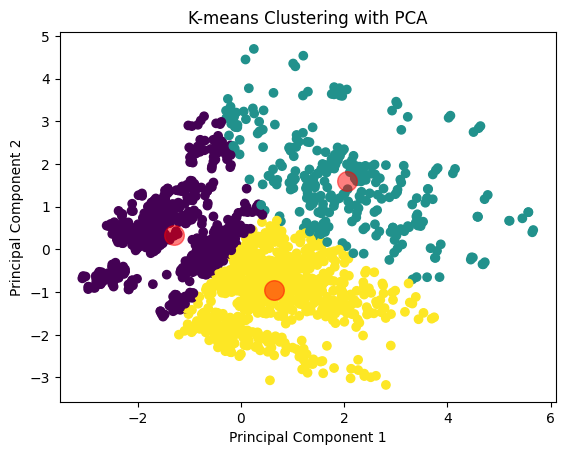

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()